In [199]:
import scipy.stats as stats
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt


In [200]:
cars_df = pd.read_csv('data/cars.csv')
cars_df = cars_df[cars_df['horsepower'] != '?']
cars_df.sample(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
44,13.0,8,400.0,175.0,5140.0,12.0,71,1,pontiac safari (sw)
283,20.2,6,232.0,90.00,3265.0,18.2,79,1,amc concord dl 6
30,28.0,4,140.0,90.00,2264.0,15.5,71,1,chevrolet vega 2300
73,13.0,8,307.0,130.0,4098.0,14.0,72,1,chevrolet chevelle concours (sw)
51,30.0,4,79.0,70.00,2074.0,19.5,71,2,peugeot 304
83,28.0,4,98.0,80.00,2164.0,15.0,72,1,dodge colt (sw)
291,19.2,8,267.0,125.0,3605.0,15.0,79,1,chevrolet malibu classic (sw)
147,24.0,4,90.0,75.00,2108.0,15.5,74,2,fiat 128
110,22.0,4,108.0,94.00,2379.0,16.5,73,3,datsun 610
102,26.0,4,97.0,46.00,1950.0,21.0,73,2,volkswagen super beetle


- Columns: MPG, Cylinders, Displacement, Weight, Acceleration, Model, Origin, Car Name
- 398 samples, no missing data, all data was numeric except Car Name
- 6 rows had '?' as the value for horsepower, those rows were removed

- Interested in difference in MPG or US-made and Japanese-made 4-cylinder vehicles

- Null Hypothesis: Japanese made cars have equal or less than MPG than US cars for 4-cylinder vehicles
- Alt Hypothesis: MPG is greater in Japanese made 4-cylinder cars

In [201]:
# cars_df_sorted = cars_df[cars_df['cylinders'] == 4].groupby(cars_df['origin']).count()
# cars_df_sorted.head()


# creating new df with only American and Japanese manufactured vehicles that are 4-cylinders

cars_df = cars_df[(cars_df['origin'] != 2) & (cars_df['cylinders'] == 4)]
cars_df.groupby('origin').median()
# cars_df.groupby(cars_df['origin']).mean()

,mpg,cylinders,displacement,weight,acceleration,model
origin,,,,,,
1,27.2,4.0,122.0,2408.0,16.2,79.0
3,32.0,4.0,97.0,2130.0,16.5,78.0


In [202]:
def sample_calcs(col1, col2='origin'):
    
    col1_df = pd.DataFrame()
    col1_df['Mean'] = cars_df.groupby(col2)[col1].mean()
    col1_df['STD'] = cars_df.groupby(col2)[col1].std()
    col1_df['Sample Size'] = cars_df.groupby(col2)[col1].count()

    return col1_df


In [203]:
def samp_dist_info(mean, std, sample_size, color):

    std_error = std / np.sqrt(sample_size)
    sample_dist_mean = stats.norm(mean, std_error)
    xs = np.linspace(mean-(4*std_error), mean+(4*std_error), 251)

    pdfs = sample_dist_mean.pdf(xs)

    return sample_dist_mean, std_error, xs

In [204]:

def graph_samp_dist(mean, std, sample_size, color):

    std_error = std / np.sqrt(sample_size)
    sample_dist_mean = stats.norm(mean, std_error)  
    xs = np.linspace(mean-(4*std_error), mean+(4*std_error), 501)

    pdfs = sample_dist_mean.pdf(xs)

    ax.plot(xs, pdfs, color=color)

In [205]:
def graph_cv_shade_alpha(dist, alpha):

    ax.axvline(dist.ppf(alpha), linestyle='--', color='grey')
    alpha_shade = xs[xs >= null_sample_dist.ppf(alpha)]
    ax.fill_between(alpha_shade, 0, null_sample_dist.pdf(alpha_shade))

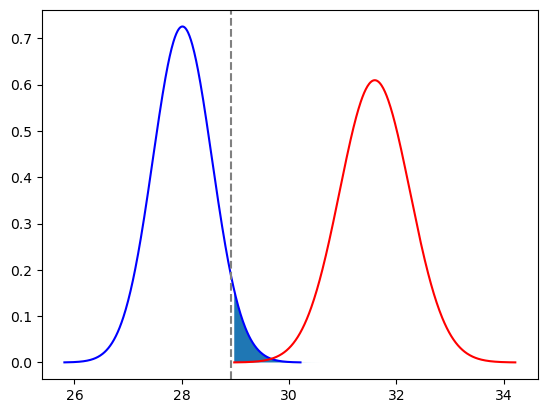

In [206]:
fig, ax = plt.subplots()

comparison_df = sample_calcs('mpg')

null_sample_dist, null_std_error, xs = samp_dist_info(comparison_df['Mean'][1], comparison_df['STD'][1], comparison_df['Sample Size'][1], 'r')
alt_sample_dist, alt_std_error, xs = samp_dist_info(comparison_df['Mean'][3], comparison_df['STD'][3], comparison_df['Sample Size'][3], 'r')

graph_samp_dist(comparison_df['Mean'][1], comparison_df['STD'][1], comparison_df['Sample Size'][1], 'b')
graph_samp_dist(comparison_df['Mean'][3], comparison_df['STD'][3], comparison_df['Sample Size'][3], 'r')

graph_cv_shade_alpha(null_sample_dist, 0.95)

In [ ]:
plt.hist(cars_df[cars_df['origin'] == 1]['mpg'], alpha=0.5, bins=20)
plt.hist(cars_df[cars_df['origin'] == 3]['mpg'], alpha=0.5, bins=20)

In [211]:
a = cars_df[cars_df['origin'] == 1]['mpg']
b = cars_df[cars_df['origin'] == 3]['mpg']
test_df = pd.DataFrame()
test_df['a'] = a.values
test_df['b'] = b.values

t, p = stats.ttest_ind(test_df['b'], test_df['a'], equal_var=False, alternative='greater')


2.5172894336033587e-05

In [ ]:
# We are able to reject our null hypothesis that US made and Japanese made 4 cylinder cars
# have the same value for MPG. With a significance level of 0.05, Japanese made cars had
# a p-value of 2.52 * 10^-5. 